# Selecting people to perform physically demanding tasks
Even in today's high-tech world, many jobs require significant physical strength to be performed properly, especially in construction, maintenance and repair work, law enforcement, highway maintenance, and [many more](https://stacker.com/stories/3222/50-most-physical-jobs-america).



## Question: How would you choose a person to perform a physically demanding job?

One natural way is to take the candidate to the job site to have them demonstrate adequate proficiency and strength at performing the task. However, this can be time intensive when selecting a large number of candidates from an equally large applicant pool. Besides, applicants risk getting injured if they are not stong enough to perform the tasks.

One could try, instead, an indirect approach: use a measure of physical strength that is simple to apply, low risk of injury, and that can be associated with how adequately a person does a job.

This mini-project will use data collected for a [study](https://tinyurl.com/y7evtzgy) in which such indirect approaches were tested against actual strength and job performance of real workers at the job. You will 
1. apply scatterplots for preliminary exploration of the potential relationships between variables of interest
2. use and test correlation coeffiencients to assess the plausibility and strength of pair of variables being linearly associated
4. verify necessary conditions for implementing a linear model
5. construct and interprert simple linear regression models
6. do inference on the regression estimates
6. Make predictions using linear models and give appropiate interpretations



## The data
The dataset you will be using is below. A description of the variables follows the two code cells.

In [1]:
%precision 2 
import pandas as pd
df=pd.read_csv('https://raw.githubusercontent.com/cpaniaguam/CSC104/main/phystrength.csv')
description = df.describe().T
description.style.format({'count':'{:.0f}', 'mean':'{:.2f}',
                              'std':'{:.2f}','min':'{:.2f}','25%':'{:.2f}',
                              '50%':'{:.2f}','75%':'{:.2f}','max':'{:.2f}'})

,count,mean,std,min,25%,50%,75%,max
GRIP,147,110.23,23.63,29.00,94.00,111.00,124.50,189.00
ARM,147,78.75,21.11,19.00,64.50,81.50,94.00,132.00
RATINGS,147,41.01,8.52,21.60,34.80,41.30,47.70,57.20
SIMS,147,0.20,1.68,-4.17,-0.96,0.16,1.07,5.17


In [2]:
df

,GRIP,ARM,RATINGS,SIMS
0,105.5,80.5,31.8,1.18
1,106.5,93.0,39.8,0.94
2,94.0,81.0,46.8,0.84
3,90.5,33.5,52.2,-2.45
4,104.0,47.5,31.2,1.00
...,...,...,...,...
142,147.0,71.0,57.2,0.53
143,109.5,86.5,43.0,2.89
144,54.0,67.5,41.7,-1.38
145,126.0,63.5,37.0,1.33


# Data description


As you can gather from above, the data consist of 147 cases and 4 variables. Each case represents a worker who performs physically demanding tasks ([lineworkers](https://en.wikipedia.org/wiki/Lineworker), [mechanics](https://en.wikipedia.org/wiki/Mechanic), [electricians](https://en.wikipedia.org/wiki/Electrician), and [construction and maintenance workers](https://en.wikipedia.org/wiki/Construction_worker)). The first two variables (`GRIP` for grip and `ARM` for arm strength) are measures of strength (in lbs.) from each worker. These measurements were gathered using a machine called [Jackson Evaluation Equipment (JES)](https://lafayetteevaluation.com/products/jackson-strength-system). The last two variables (`RATINGS` and `SIMS`) are job performance measurements. `RATINGS` is a rank given to each worker by their respective supervisors (the higher the better). `SIMS` is an artificial variable based on a simulation that required workers to exert force on an artificial wrench while standing and kneeling. Larger scores indicate better performance.

### Task 1
a. Look at the distributions for each of the variables. In a text cell describe their shape (center, symmetry, modes, skewness, etc.) Answer questions like the following to start getting a feel for the data: What proportion of workers exerted force greater than 100 lbs.? Were the workers in the sample mostly 'good'?

b. As analysts we like it when variables in our data follow well-known distributions, such as the normal distribution. Do any of the variables appear to be normal? Conduct normality checks using the [*empirical rule*](https://learn.zybooks.com/zybook/SALVECSC104PaniaguaSpring2021/chapter/4/section/4?content_resource_id=48842584), and *qq plots* or *normal probability plots*. Do these methods agree?

In [73]:
# import necessary libraries
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import math as mt
import scipy.stats as st
%matplotlib inline

## GRIP DISTRIBUTION

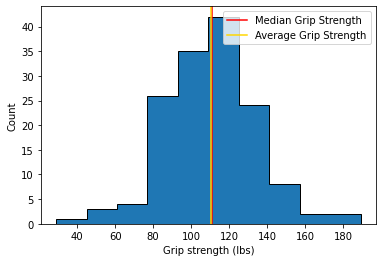

In [4]:
plt.hist(data= df, x= 'GRIP', histtype= 'stepfilled', edgecolor= 'black')
plt.axvline(df['GRIP'].median(), color= 'red', label='Median Grip Strength')
plt.axvline(df['GRIP'].mean(), color= 'gold', label='Average Grip Strength')
plt.xlabel("Grip strength (lbs)")
plt.ylabel("Count")
plt.legend()
plt.show()

Distinct peak at around 120 lbs. Centeredness due mean and median (very close together). No sign of skewness. Unimodal for the most part - no other peak

In [90]:
count = 0
for row in df['GRIP']:
    if row > 100:
        count +=1
print("The proportion of workers who exerted a force greater than 100: {:.2f}%".format(count/df.shape[0]*100))

The proportion of workers who exerted a force greater than 100: 65.31%


#### Checking normality using empirical rule (68% of data lies within one standard deviation from the mean). GRIP looks the closest to a normal distribution

In [91]:
df.GRIP.std() #23.62987081837943
df.GRIP.mean() #110.2312925170068
lower_bound = df.GRIP.mean() - df.GRIP.std()
upper_bound = df.GRIP.mean() + df.GRIP.std()

count = 0
for row in df['GRIP']:
    if upper_bound > row > lower_bound:
        count +=1
proportion = count/df.shape[0] * 100
if int(count) == 68:
    print("68 of data lies within one standard deviation from the mean, meaning that it follows the empirical rule of normality")
else:
    print("GRIP does not follow the empirical rule of normality, the proportion is: {:.2F}%".format(proportion))

GRIP does not follow the empirical rule of normality, the proportion is: 75.51%


## ARM DISTRIBUTION

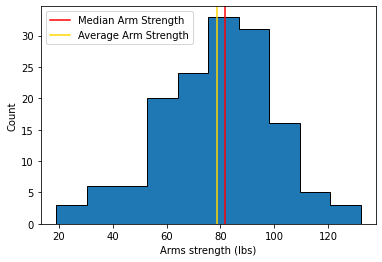

In [7]:
plt.hist(data= df, x= 'ARM', histtype= 'stepfilled', edgecolor= 'black')
plt.axvline(df['ARM'].median(), color= 'red', label='Median Arm Strength')
plt.axvline(df['ARM'].mean(), color= 'gold', label='Average Arm Strength')
plt.xlabel("Arms strength (lbs)")
plt.ylabel("Count")
plt.legend()
plt.show()

Although not distinct, peak at around 80 lbs. Could say that it is left-skewed; also evident because the median is greater than the mean. Having low values for the end tails are expected (similar behaviour in grip strength plot above)

Physically demanding jobs generally require the abillity to lift 50-75lbs (exclusive of higher weights because that'll be dedicated to team lifts instead).

The proportion of workers who have arm strength of 50lbs and above are deemed to be 'good'

Therefore, I will show the proportion of workers who have 50lbs arm strength and above:

In [8]:
count = 0
for row in df['ARM']:
    if row >= 50:
        count +=1
proportion = count/df.shape[0] * 100

print("{:.2f}% of workers are deemed to be 'good'.".format(proportion))

91.16% of workers are deemed to be 'good'.


## RATINGS DISTRIBUTION

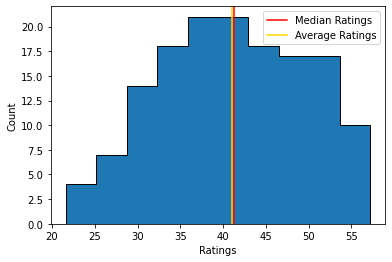

In [10]:
plt.hist(data= df, x= 'RATINGS', histtype= 'stepfilled', edgecolor= 'black')
plt.axvline(df['RATINGS'].median(), color= 'red', label='Median Ratings')
plt.axvline(df['RATINGS'].mean(), color= 'gold', label='Average Ratings')
plt.xlabel("Ratings")
plt.ylabel("Count")
plt.legend()
plt.show()

Not symmetric. However, median and mean centered at approximately 41. Count overall is above 7, Good ratings from the workers

## FORCE EXERTED DISTRIBUTION

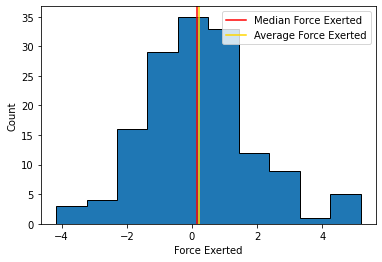

In [11]:
plt.hist(data= df, x= 'SIMS', histtype= 'stepfilled', edgecolor= 'black')
plt.axvline(df['SIMS'].median(), color= 'red', label='Median Force Exerted')
plt.axvline(df['SIMS'].mean(), color= 'gold', label='Average Force Exerted')
plt.xlabel("Force Exerted")
plt.ylabel("Count")
plt.legend()
plt.show()

Median and average similar in value. (around) 0 force exerted seems to be most frequent. Potential outlier above 4. Ratings overall are around 40, but there are a lot of workers who have a force exertion of below 0. Does force not have a lot of weight in consideration of rating?

## Task 2:
 Exploring relationships among the variables
We want to use `GRIP` and `ARM` as predictors of `RATINGS` and `SIMS`. Are these variables linearly associated?

1. Construct scatterplots of `ARM` and `GRIP` against `RATINGS`and `SIMS`. Do they seem to be correlated? By looking at these plots, how strong will you say the relations seem to be?
2. Obtain the respective correlation coefficients and coefficients of determination. Verify your predictions.
3. Write down your conclusions.

In [12]:
from statsmodels.formula.api import ols # exploring relationships between variables

In [13]:
print(df[['ARM','GRIP', 'RATINGS', 'SIMS']].corr())

              ARM      GRIP   RATINGS      SIMS
ARM      1.000000  0.629836  0.221280  0.686007
GRIP     0.629836  1.000000  0.183257  0.639846
RATINGS  0.221280  0.183257  1.000000  0.168084
SIMS     0.686007  0.639846  0.168084  1.000000


It seems like arm strength and grip strength do not have effect on ratings. Which is nice to hear (from a moral stand point). But, these are _physically demanding_ jobs, I would have thought the abillity to lift more would positively correlate with ratings.

We however, see a positive strong correlation between arm and grip strength and the artificial variable, SIMS. Which is expected. If humans can lift past a certain threshold, computers know no better to deem that as good.

## RATINGS AGAINST ARM STRENGTH

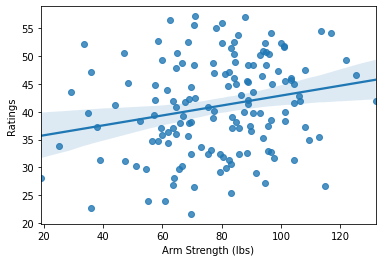

In [14]:
sns.regplot(x= df['ARM'], y= df['RATINGS'])
plt.xlabel("Arm Strength (lbs)")
plt.ylabel("Ratings")
plt.show()

Prediction: Very weak, Not correlated at all

In [15]:
results = ols('RATINGS ~ ARM', data=df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                RATINGS   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     7.465
Date:                Thu, 18 Mar 2021   Prob (F-statistic):            0.00707
Time:                        22:05:27   Log-Likelihood:                -519.36
No. Observations:                 147   AIC:                             1043.
Df Residuals:                     145   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.9749      2.665     12.748      0.000      28.708      39.242
ARM            0.0893      0.033      2.732      0.007       0.025       0.154
==============================================================================
Omnibus:                        8.248   Durbin-Watson:                   2.169
Prob(Omnibus):                  0.016   Jarque-Bera (JB):                3.661
Skew:                          -0.047   Prob(JB):                        0.160
Kurtosis:                       2.233   Cond. No.                         316.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-squared is low: 0.049. Suggesting that there is weak correlation. Therefore prediction is correct

## FORCE EXERTED AGAINST ARM STRENGTH

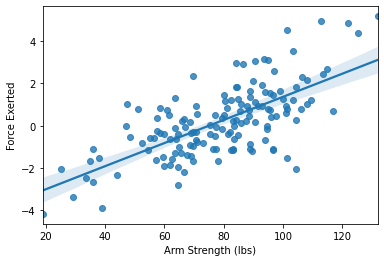

In [16]:
sns.regplot(x= df['ARM'], y= df['SIMS'])
plt.xlabel("Arm Strength (lbs)")
plt.ylabel("Force Exerted")
plt.show()

Prediction: Strong, positive correlation. The more arm strength you have, the greater force you can exert due to the simulation

In [17]:
results = ols('SIMS ~ ARM', data=df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   SIMS   R-squared:                       0.471
Model:                            OLS   Adj. R-squared:                  0.467
Method:                 Least Squares   F-statistic:                     128.9
Date:                Thu, 18 Mar 2021   Prob (F-statistic):           9.01e-22
Time:                        22:05:27   Log-Likelihood:                -237.51
No. Observations:                 147   AIC:                             479.0
Df Residuals:                     145   BIC:                             485.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.0952      0.392    -10.454      0.000      -4.869      -3.321
ARM            0.0546      0.005     11.353      0.000       0.045       0.064
==============================================================================
Omnibus:                        0.623   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.732   Jarque-Bera (JB):                0.403
Skew:                           0.122   Prob(JB):                        0.817
Kurtosis:                       3.080   Cond. No.                         316.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-squared is higher than Ratings against arm strength: 0.471, suggesting that there is a stronger correlation (max is 1), as expected. Therefore prediction is correct

## RATINGS AGAINST GRIP STRENGTH

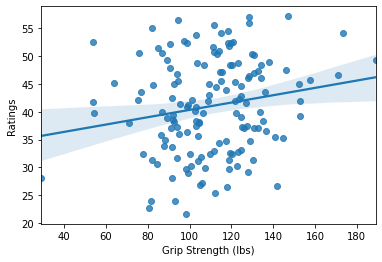

In [18]:
sns.regplot(x= df['GRIP'], y= df['RATINGS'])
plt.xlabel("Grip Strength (lbs)")
plt.ylabel("Ratings")
plt.show()

Prediction: Weak, no correlation

In [19]:
results = ols('RATINGS ~ GRIP', data=df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                RATINGS   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     5.039
Date:                Thu, 18 Mar 2021   Prob (F-statistic):             0.0263
Time:                        22:05:28   Log-Likelihood:                -520.54
No. Observations:                 147   AIC:                             1045.
Df Residuals:                     145   BIC:                             1051.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.7247      3.319     10.162      0.000      27.165      40.284
GRIP           0.0661      0.029      2.245      0.026       0.008       0.124
==============================================================================
Omnibus:                       10.590   Durbin-Watson:                   2.205
Prob(Omnibus):                  0.005   Jarque-Bera (JB):                4.215
Skew:                          -0.055   Prob(JB):                        0.122
Kurtosis:                       2.178   Cond. No.                         540.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Lowest R-squared value, 0.034. Subsequently, weakest correlation as predicted. 

## FORCE EXERTED AGAINST GRIP STRENGTH

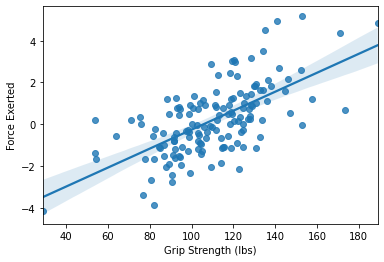

In [20]:
sns.regplot(x= df['GRIP'], y= df['SIMS'])
plt.xlabel("Grip Strength (lbs)")
plt.ylabel("Force Exerted")
plt.show()

Prediction: Positive, strong correlation. Similar to Force against arm strength, the more grip strength you have, the greater force you can exert due to the simulation

In [21]:
results = ols('SIMS ~ GRIP', data=df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   SIMS   R-squared:                       0.409
Model:                            OLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                     100.5
Date:                Thu, 18 Mar 2021   Prob (F-statistic):           2.68e-18
Time:                        22:05:28   Log-Likelihood:                -245.55
No. Observations:                 147   AIC:                             495.1
Df Residuals:                     145   BIC:                             501.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.8097      0.511     -9.410      0.000      -5.820      -3.799
GRIP           0.0455      0.005     10.026      0.000       0.037       0.054
==============================================================================
Omnibus:                        1.480   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.477   Jarque-Bera (JB):                1.559
Skew:                           0.225   Prob(JB):                        0.459
Kurtosis:                       2.771   Cond. No.                         540.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-squared is similar to than Ratings against arm strength: 0.409, suggesting that there is a stronger correlation (max is 1), as expected. Therefore prediction is correct

# Inferential Analysis

## Task 3: Are these correlation coefficients significant?

Conduct the four possible tests for significance at the $0.05$ significance level. For each write the null and alternative hypotheses, the type of alternative hypothesis, and the p-value. Write down your conclusions.



In [22]:
print("Recall correlation matrix: \n{}".format(df[['ARM','GRIP', 'RATINGS', 'SIMS']].corr()))

Recall correlation matrix: 
              ARM      GRIP   RATINGS      SIMS
ARM      1.000000  0.629836  0.221280  0.686007
GRIP     0.629836  1.000000  0.183257  0.639846
RATINGS  0.221280  0.183257  1.000000  0.168084
SIMS     0.686007  0.639846  0.168084  1.000000


## RATINGS AGAINST ARM STRENGTH

$H_{0} : \rho = 0$

$H_{1} : \rho \neq 0$

In [79]:
p = st.stats.pearsonr(df['ARM'], df['RATINGS'])[1]
p = p*2
p

0.014143424768260436

In [27]:
print("Because {} < {}, reject null hypothesis. Sufficient evidence to support alternative hypothesis".format(p, 0.05))

Because 0.0035358561920651173 < 0.05, reject null hypothesis. Sufficient evidence to support alternative hypothesis


## FORCE EXERTED AGAINST ARM STRENGTH

$H_{0} : \rho = 0$

$H_{1} : \rho \neq 0$

In [80]:
p = st.stats.pearsonr(df['ARM'], df['SIMS'])[1]
p = p*2
p

1.8027023876990078e-21

In [81]:
print("Because {} < {}, reject null hypothesis. Sufficient evidence to support alternative hypothesis".format(p, 0.05))

Because 1.8027023876990078e-21 < 0.05, reject null hypothesis. Sufficient evidence to support alternative hypothesis


## RATINGS AGAINST GRIP STRENGTH

$H_{0} : \rho = 0$

$H_{1} : \rho \neq 0$

In [86]:
p = st.stats.pearsonr(df['GRIP'], df['RATINGS'])[1]
p = p*2
p

0.05259931080386102

In [85]:
print("Because {} > {}, reject alternative hypothesis. Sufficient evidence to support null hypothesis".format(p, 0.05))

Because 0.05259931080386102 > 0.05, reject alternative hypothesis. Sufficient evidence to support null hypothesis


## FORCE EXERTED AGAINST GRIP STRENGTH

$H_{0} : \rho = 0$

$H_{1} : \rho \neq 0$

In [87]:
p = st.stats.pearsonr(df['GRIP'], df['SIMS'])[1]
p = p*2
p

5.369509506138375e-18

In [88]:
print("Because {} < {}, reject null hypothesis. Sufficient evidence to support alternative hypothesis".format(p, 0.05))

Because 5.369509506138375e-18 < 0.05, reject null hypothesis. Sufficient evidence to support alternative hypothesis


Due to inferential analysis, it seems that ratings and grip strength truly do not have a correlation; the rest do.

## Task 4: Looking at the residuals and checking assumptions
Before we can make predictions with a linear regression model, we must check the assumptions for the model are met. Otherwise any predictions we make would be unreliable.

1. Obtain the estimates for the slope and intercept for each regression model.
2. Construct residual plots. Do the zero mean, constant variance, normality, and independce assumptions reasonably check out? Write your conclusions in the text cell below.

## RATINGS AGAINST ARM STRENGTH

In [37]:
results = ols('RATINGS ~ ARM', data=df).fit()
results.summary()
# intercept = 33.9749
# slope = 0.0893

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                RATINGS   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     7.465
Date:                Thu, 18 Mar 2021   Prob (F-statistic):            0.00707
Time:                        22:05:28   Log-Likelihood:                -519.36
No. Observations:                 147   AIC:                             1043.
Df Residuals:                     145   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.9749      2.665     12.748      0.000      28.708      39.242
ARM            0.0893      0.033      2.732      0.007       0.025       0.154
==============================================================================
Omnibus:                        8.248   Durbin-Watson:                   2.169
Prob(Omnibus):                  0.016   Jarque-Bera (JB):                3.661
Skew:                          -0.047   Prob(JB):                        0.160
Kurtosis:                       2.233   Cond. No.                         316.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
model = st.linregress(df['ARM'], df['RATINGS'])
print(model)

LinregressResult(slope=0.08933102491662745, intercept=33.97490741532423, rvalue=0.2212800263204302, pvalue=0.007071712384130209, stderr=0.03269447632447939)


In [39]:
residual_ratings_arm = []
for rating, arm in zip(df['RATINGS'], df['ARM']):
    residual_ratings_arm.append(rating - model[1] - (model[0]*arm))

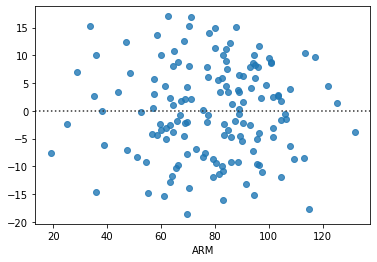

In [40]:
sns.residplot(x = df['ARM'], y = residual_ratings_arm)
plt.show()

The residuals in the plot look random therefore the zero-mean assumption holds.

The variance is approximately constant all the way across the plot; the "constant variance" assumption holds.

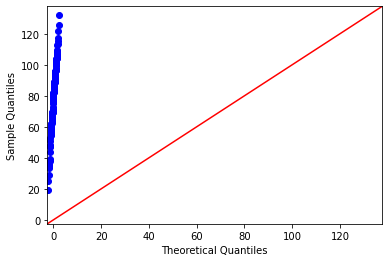

In [41]:
fig = sm.qqplot(df['ARM'], line='45')
plt.show()

Although straight, the plotted points in the plot do not lie close to the diagonal line. The "normality" assumption does not hold for the data.

## FORCE EXERTED AGAINST ARM STRENGTH

In [42]:
results = ols('SIMS ~ ARM', data=df).fit()
results.summary()
# intercept = -4.0952
# slope = 0.0546

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   SIMS   R-squared:                       0.471
Model:                            OLS   Adj. R-squared:                  0.467
Method:                 Least Squares   F-statistic:                     128.9
Date:                Thu, 18 Mar 2021   Prob (F-statistic):           9.01e-22
Time:                        22:05:28   Log-Likelihood:                -237.51
No. Observations:                 147   AIC:                             479.0
Df Residuals:                     145   BIC:                             485.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.0952      0.392    -10.454      0.000      -4.869      -3.321
ARM            0.0546      0.005     11.353      0.000       0.045       0.064
==============================================================================
Omnibus:                        0.623   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.732   Jarque-Bera (JB):                0.403
Skew:                           0.122   Prob(JB):                        0.817
Kurtosis:                       3.080   Cond. No.                         316.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
model = st.linregress(df['ARM'], df['SIMS'])
print(model)

LinregressResult(slope=0.0545629953343179, intercept=-4.0951599693042935, rvalue=0.686007288855486, pvalue=9.013511938495686e-22, stderr=0.004805902764661299)


In [44]:
residual_ratings_arm = []
for rating, arm in zip(df['SIMS'], df['ARM']):
    residual_ratings_arm.append(rating - model[1] - (model[0]*arm))

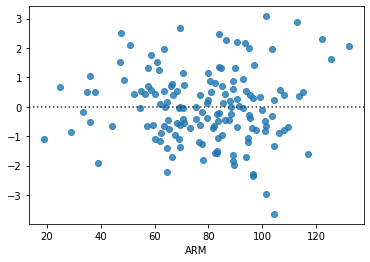

In [45]:
sns.residplot(x = df['ARM'], y = residual_ratings_arm)
plt.show()

The residuals in the plot look random therefore the zero-mean assumption holds.

The residuals in the plot on the have a non-random pattern. The "constant variance" assumption does not hold for the data in the right-hand plot.

## RATINGS AGAINST GRIP STRENGTH

In [46]:
results = ols('RATINGS ~ GRIP', data=df).fit()
results.summary()
# intercept = 33.7247
# slope = 0.0661

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                RATINGS   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     5.039
Date:                Thu, 18 Mar 2021   Prob (F-statistic):             0.0263
Time:                        22:05:29   Log-Likelihood:                -520.54
No. Observations:                 147   AIC:                             1045.
Df Residuals:                     145   BIC:                             1051.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.7247      3.319     10.162      0.000      27.165      40.284
GRIP           0.0661      0.029      2.245      0.026       0.008       0.124
==============================================================================
Omnibus:                       10.590   Durbin-Watson:                   2.205
Prob(Omnibus):                  0.005   Jarque-Bera (JB):                4.215
Skew:                          -0.055   Prob(JB):                        0.122
Kurtosis:                       2.178   Cond. No.                         540.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
model = st.linregress(df['GRIP'], df['RATINGS'])
print(model)

LinregressResult(slope=0.06608979381586105, intercept=33.72471415651556, rvalue=0.18325721888924767, pvalue=0.026299655401930497, stderr=0.029442286745995618)


In [53]:
residual_ratings_arm = []
for rating, arm in zip(df['RATINGS'], df['GRIP']):
    residual_ratings_arm.append(rating - model[1] - (model[0]*arm))

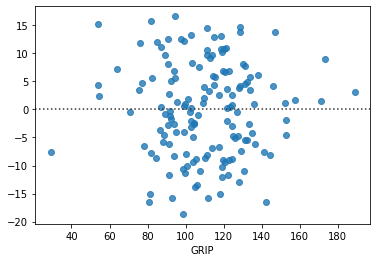

In [55]:
sns.residplot(x = df['GRIP'], y = residual_ratings_arm)
plt.show()

The residuals in the plot look random therefore the zero-mean assumption holds.

The variance is approximately constant all the way across the plot; the "constant variance" assumption holds.

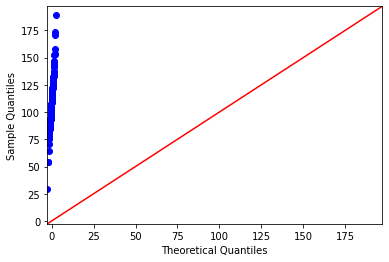

In [51]:
fig = sm.qqplot(df['GRIP'], line='45')
plt.show()

Similar to `ARM`: although straight, the plotted points in the plot do not lie close to the diagonal line. The "normality" assumption does not hold for the data.

## FORCE EXERTED AGAINST GRIP STRENGTH

In [47]:
results = ols('SIMS ~ GRIP', data=df).fit()
results.summary()
# intercept = -4.8097
# slope = 0.0455

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   SIMS   R-squared:                       0.409
Model:                            OLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                     100.5
Date:                Thu, 18 Mar 2021   Prob (F-statistic):           2.68e-18
Time:                        22:05:29   Log-Likelihood:                -245.55
No. Observations:                 147   AIC:                             495.1
Df Residuals:                     145   BIC:                             501.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.8097      0.511     -9.410      0.000      -5.820      -3.799
GRIP           0.0455      0.005     10.026      0.000       0.037       0.054
==============================================================================
Omnibus:                        1.480   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.477   Jarque-Bera (JB):                1.559
Skew:                           0.225   Prob(JB):                        0.459
Kurtosis:                       2.771   Cond. No.                         540.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
model = st.linregress(df['GRIP'], df['SIMS'])
print(model)

LinregressResult(slope=0.04546298764143522, intercept=-4.809675181917117, rvalue=0.6398457588748769, pvalue=2.6847547530692897e-18, stderr=0.004534657000347742)


In [57]:
residual_ratings_arm = []
for rating, arm in zip(df['SIMS'], df['GRIP']):
    residual_ratings_arm.append(rating - model[1] - (model[0]*arm))

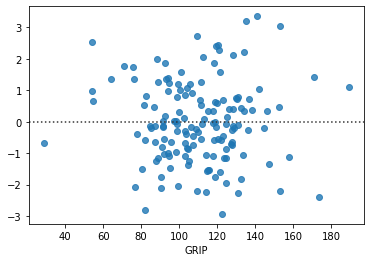

In [58]:
sns.residplot(x = df['GRIP'], y = residual_ratings_arm)
plt.show()

The residuals in the plot look random therefore the zero-mean assumption holds.

The variance is approximately constant all the way across the plot; the "constant variance" assumption holds.

## Task 5: Make some predictions (if everything worked out!)

1. A worker with 125 lbs of  `GRIP` and 95 lbs of `ARM` applies for one of these jobs. Using the appropiate model, obtain $95\%$ confidence intervals for `RATINGS` and `SIMS`. Would you recommend a manager to hire such a candidate?

## RATINGS AGAINST ARM STRENGTH

In [68]:
model = ols('RATINGS ~ ARM', data = df).fit()
x0 = pd.DataFrame(np.array([[95]]),columns=['ARM'])
model.predict(x0)
model.predict(x0)
intervals = model.get_prediction(x0)
print(intervals.summary_frame())
# print(model.summary())

0    42.461355
dtype: float64
        mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  42.461355  0.869071      40.743672      44.179038     25.889964   

   obs_ci_upper  
0     59.032746  


## FORCE EXERTED AGAINST ARM STRENGTH

In [69]:
model = ols('SIMS ~ ARM', data = df).fit()
x0 = pd.DataFrame(np.array([[95]]),columns=['ARM'])
model.predict(x0)
model.predict(x0)
intervals = model.get_prediction(x0)
print(intervals.summary_frame())

0    1.088325
dtype: float64
       mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  1.088325  0.127748       0.835835       1.340814     -1.347576   

   obs_ci_upper  
0      3.524225  


## RATINGS AGAINST GRIP STRENGTH

In [70]:
model = ols('RATINGS ~ GRIP', data = df).fit()
x0 = pd.DataFrame(np.array([[125]]),columns=['GRIP'])
model.predict(x0)
intervals = model.get_prediction(x0)
print(intervals.summary_frame())

0    41.985938
dtype: float64
        mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  41.985938  0.818415      40.368375      43.603502     25.292503   

   obs_ci_upper  
0     58.679374  


## FORCE EXERTED AGAINST GRIP STRENGTH

In [71]:
model = ols('SIMS ~ GRIP', data = df).fit()
x0 = pd.DataFrame(np.array([[125]]),columns=['GRIP'])
model.predict(x0)
intervals = model.get_prediction(x0)
print(intervals.summary_frame())

0    0.873198
dtype: float64
       mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  0.873198  0.126051       0.624064       1.122333       -1.6979   

   obs_ci_upper  
0      3.444296  


The workers rating (in respect to arm strength and grip strength) was in the range of roughly 25-59 which is expected. Their force exerted (`SIMS`) also follows the expected range of about -1.5 to 3.5

This worker follows the expectation, it would be smart to hire this candidate

The predicted values lie close to the average (average values shown on the histograms in task 1)